# Revised Simplex (Regular)

In [112]:
import numpy as np

class RevisedSimplex:
    def __init__(self, objective_coeffs, constraint_matrix, constraint_rhs):
        self.objective_coeffs = np.array(objective_coeffs, dtype=float)
        self.constraint_matrix = np.array(constraint_matrix, dtype=float)
        self.constraint_rhs = np.array(constraint_rhs, dtype=float)
        self.num_constraints, self.num_variables = self.constraint_matrix.shape
        self.tableau= np.hstack((self.constraint_matrix, np.eye(self.num_constraints)))
        self.objective_coeffs= np.concatenate((self.objective_coeffs, np.zeros(self.num_constraints)))
        self.basic_vars =np.arange(self.num_variables, self.num_variables + self.num_constraints)
        self.nonbasic_vars=np.arange(self.num_variables)
        self.basis_inverse = np.eye(self.num_constraints)
        self.objective_value = 0

    def solve(self):
        while True:
            basic_coeffs = self.objective_coeffs[self.basic_vars]
            basis_matrix = self.tableau[:, self.basic_vars]
            basis_inverse= np.linalg.inv(basis_matrix)
            basic_solution=basis_inverse @ self.constraint_rhs
            reduced_cost_matrix = basis_inverse @ self.tableau[:, self.nonbasic_vars]
            reduced_costs = self.objective_coeffs[self.nonbasic_vars] - basic_coeffs.T @ reduced_cost_matrix
            if np.all(reduced_costs >= 0):
                self.objective_value = basic_coeffs.T @ basic_solution
                return self.objective_value
            entering_idx = np.argmin(reduced_costs)
            entering_var = self.nonbasic_vars[entering_idx]
            direction = basis_inverse @ self.tableau[:, entering_var]
            ratios = np.divide(basic_solution, direction, out=np.full_like(basic_solution, np.inf), where=direction > 0)
            if np.all(ratios == np.inf):
                return "Unbounded"
            leaving_idx=np.argmin(ratios)
            leaving_var=self.basic_vars[leaving_idx]
            self.basic_vars[leaving_idx]=entering_var
            self.nonbasic_vars[entering_idx]=leaving_var
            direction[leaving_idx]=1
            self.basis_inverse = basis_inverse - np.outer(basis_inverse[:, leaving_idx], direction) / direction[leaving_idx]



# Test cases

In [113]:
from scipy.optimize import linprog

In [114]:
#Test 1
rev = RevisedSimplex(np.array([-9,-7]),np.array([[10,5],[6,6],[4.5,18]]),np.array([50,36,81]))
print('Test 1 From Scratch:',-1*rev.solve())
print()
#Built in
objective_coefficients =[-9,-7]
constraint_matrix = [
   [10,5],[6,6],[4.5,18]
]
constraint_rhs =[50,36,81]
variable_bounds = [(0, None), (0, None)]

result = linprog(objective_coefficients, A_ub=constraint_matrix, b_ub=constraint_rhs, bounds=variable_bounds, method="revised simplex")

print('Test 1 Built in',result)

Test 1 From Scratch: 49.999999999999986

Test 1 Built in  message: Optimization terminated successfully.
 success: True
  status: 0
     fun: -50.0
       x: [ 4.000e+00  2.000e+00]
     nit: 2


<ipython-input-114-4a56ae5c40ba>:13: DeprecationWarning: `method='revised simplex'` is deprecated and will be removed in SciPy 1.11.0. Please use one of the HiGHS solvers (e.g. `method='highs'`) in new code.
  result = linprog(objective_coefficients, A_ub=constraint_matrix, b_ub=constraint_rhs, bounds=variable_bounds, method="revised simplex")


In [115]:
#TEST 2
rev = RevisedSimplex(np.array([-5,-4]),np.array([[6,4],[1,2],[-1,1],[0,1]]),np.array([24,6,1,2]))
print('Test 2 From Scratch:',-1*rev.solve())


Test 2 From Scratch: 20.999999999999996


In [116]:
#Built in
objective_coefficients =[-5,-4]
constraint_matrix = [
   [6,4],[1,2],[-1,1],[0,1]
]
constraint_rhs =[24,6,1,2]
variable_bounds = [(0, None), (0, None)]

result = linprog(objective_coefficients, A_ub=constraint_matrix, b_ub=constraint_rhs, bounds=variable_bounds, method="revised simplex")

print('Test 1 Built in',result)

Test 1 Built in  message: Optimization terminated successfully.
 success: True
  status: 0
     fun: -21.0
       x: [ 3.000e+00  1.500e+00]
     nit: 2


<ipython-input-116-fab6b88dae00>:9: DeprecationWarning: `method='revised simplex'` is deprecated and will be removed in SciPy 1.11.0. Please use one of the HiGHS solvers (e.g. `method='highs'`) in new code.
  result = linprog(objective_coefficients, A_ub=constraint_matrix, b_ub=constraint_rhs, bounds=variable_bounds, method="revised simplex")


In [117]:
#Test 3
rev = RevisedSimplex(np.array([-3, -2]),np.array([[4, -1],[4, 3],[4, 1]]),np.array([8, 12, 8]))
print('Test 3 :',-1*rev.solve())


Test 3 : 8.5


In [118]:
#Built in
objective_coefficients =[-3, -2]
constraint_matrix = [
   [4, -1],[4, 3],[4, 1]
]
constraint_rhs =[8, 12, 8]
variable_bounds = [(0, None), (0, None)]

result = linprog(objective_coefficients, A_ub=constraint_matrix, b_ub=constraint_rhs, bounds=variable_bounds, method="revised simplex")

print('Test 3 Built in',result)

Test 3 Built in  message: Optimization terminated successfully.
 success: True
  status: 0
     fun: -8.5
       x: [ 1.500e+00  2.000e+00]
     nit: 3


<ipython-input-118-baa099bd1162>:9: DeprecationWarning: `method='revised simplex'` is deprecated and will be removed in SciPy 1.11.0. Please use one of the HiGHS solvers (e.g. `method='highs'`) in new code.
  result = linprog(objective_coefficients, A_ub=constraint_matrix, b_ub=constraint_rhs, bounds=variable_bounds, method="revised simplex")


In [119]:
#Test 4
rev = RevisedSimplex(np.array([4,1]),np.array([[3, 1],[-4, -3],[1,2]]),np.array([3,-6,4]))
print('Test 4 :',-1*rev.solve())


Test 4 : -0.0


In [120]:
#Built in
objective_coefficients =[4,1]
constraint_matrix = [
[3, 1],[-4, -3],[1,2]
                      ]
constraint_rhs =[3,-6,4]
variable_bounds = [(0, None), (0, None)]

result = linprog(objective_coefficients, A_ub=constraint_matrix, b_ub=constraint_rhs, bounds=variable_bounds, method="revised simplex")

print('Test 4 Built in',result)

Test 4 Built in  message: Optimization terminated successfully.
 success: True
  status: 0
     fun: 2.0
       x: [ 0.000e+00  2.000e+00]
     nit: 3


<ipython-input-120-e46972a025d5>:9: DeprecationWarning: `method='revised simplex'` is deprecated and will be removed in SciPy 1.11.0. Please use one of the HiGHS solvers (e.g. `method='highs'`) in new code.
  result = linprog(objective_coefficients, A_ub=constraint_matrix, b_ub=constraint_rhs, bounds=variable_bounds, method="revised simplex")


In [121]:
#Test 4
rev = RevisedSimplex(np.array([-3,-9]),np.array([[1, 4],[1, 2]]),np.array([8,4]))
print('Test 4 :',-1*rev.solve())


Test 4 : 18.0


In [122]:
#Built in
objective_coefficients = [-3,-9]
constraint_matrix = [
[1, 4],[1, 2]
                      ]
constraint_rhs =[8,4]
variable_bounds = [(0, None), (0, None)]

result = linprog(objective_coefficients, A_ub=constraint_matrix, b_ub=constraint_rhs, bounds=variable_bounds, method="revised simplex")

print('Test 4 Built in',result)

Test 4 Built in  message: Optimization terminated successfully.
 success: True
  status: 0
     fun: -18.0
       x: [ 0.000e+00  2.000e+00]
     nit: 2


<ipython-input-122-4137baaedaae>:9: DeprecationWarning: `method='revised simplex'` is deprecated and will be removed in SciPy 1.11.0. Please use one of the HiGHS solvers (e.g. `method='highs'`) in new code.
  result = linprog(objective_coefficients, A_ub=constraint_matrix, b_ub=constraint_rhs, bounds=variable_bounds, method="revised simplex")


# Two phases Revised Simplex

In [123]:
import numpy as np

class RevisedSimplex:
    def __init__(self, objective_coeffs, constraint_matrix, constraint_rhs):
        self.original_objective_coeffs = np.array(objective_coeffs, dtype=float)
        self.constraint_matrix = np.array(constraint_matrix, dtype=float)
        self.constraint_rhs = np.array(constraint_rhs, dtype=float)
        self.num_constraints, self.num_variables = self.constraint_matrix.shape
        self.tableau = np.hstack((self.constraint_matrix, np.eye(self.num_constraints)))
        self.objective_coeffs = np.concatenate((self.original_objective_coeffs, np.zeros(self.num_constraints)))
        self.basic_vars = np.arange(self.num_variables, self.num_variables + self.num_constraints)
        self.nonbasic_vars = np.arange(self.num_variables)
        self.basis_inverse = np.eye(self.num_constraints)
        self.phase1 = False

    def solve(self):
        if np.any(self.constraint_rhs < 0):
            print("Phase 1 initiated: infeasible initial solution detected.")
            if not self.perform_phase1():
                return "Infeasible problem"
        print("Starting Phase 2: Optimizing original objective function.")
        self.objective_coeffs = np.concatenate((self.original_objective_coeffs, np.zeros(self.num_constraints)))
        return self.phase2_optimize()

    def perform_phase1(self):
        artificial_objective = np.zeros_like(self.tableau[0])
        artificial_objective[-self.num_constraints:] = 1
        artificial_vars = np.arange(self.num_variables + self.num_constraints,
                                    self.num_variables + 2 * self.num_constraints)
        self.tableau = np.hstack((self.tableau, np.eye(self.num_constraints)))
        phase1_obj_coeffs = np.concatenate((np.zeros(self.num_variables + self.num_constraints), np.ones(self.num_constraints)))
        return self.simplex_step(phase1_obj_coeffs, artificial_vars, True)

    def phase2_optimize(self):
        return self.simplex_step(self.objective_coeffs, self.nonbasic_vars, False)

    def simplex_step(self, obj_coeffs, nonbasic_vars, is_phase1):
        while True:
            basic_coeffs = obj_coeffs[self.basic_vars]
            basis_matrix = self.tableau[:, self.basic_vars]
            self.basis_inverse = np.linalg.inv(basis_matrix)
            basic_solution = self.basis_inverse @ self.constraint_rhs
            reduced_cost_matrix = self.basis_inverse @ self.tableau[:, nonbasic_vars]
            reduced_costs = obj_coeffs[nonbasic_vars] - basic_coeffs.T @ reduced_cost_matrix

            # Check optimality
            if np.all(reduced_costs >= 0):
                if is_phase1 and np.any(basic_solution[-self.num_constraints:] > 0):
                    return False
                elif is_phase1:

                    self.phase1 = True
                    return True
                else:
                    self.objective_value = basic_coeffs.T @ basic_solution
                    return self.objective_value
            entering_idx = np.argmin(reduced_costs)
            entering_var = nonbasic_vars[entering_idx]
            direction = self.basis_inverse @ self.tableau[:, entering_var]
            ratios = np.divide(basic_solution, direction, out=np.full_like(basic_solution, np.inf), where=direction > 0)
            if np.all(ratios == np.inf):
                return "Unbounded"
            leaving_idx = np.argmin(ratios)
            leaving_var = self.basic_vars[leaving_idx]
            self.basic_vars[leaving_idx] = entering_var
            nonbasic_vars[entering_idx] = leaving_var
            direction[leaving_idx] = 1
            self.basis_inverse = self.basis_inverse - np.outer(self.basis_inverse[:, leaving_idx], direction) / direction[leaving_idx]


In [124]:
#Test 1
rev = RevisedSimplex(np.array([-9,-7]),np.array([[10,5],[6,6],[4.5,18]]),np.array([50,36,81]))
print('Test 1 From Scratch:',-1*rev.solve())
print()

Starting Phase 2: Optimizing original objective function.
Test 1 From Scratch: 49.999999999999986



Traced coding example

# Example
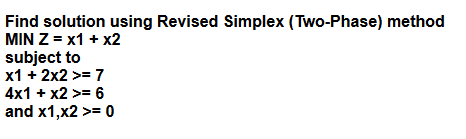

In [125]:
import numpy as np
import sys
c = np.array([1, 1])


A = np.array([
    [1, 2],
    [4, 1]
])
b = np.array([7, 6])

c_reshaped = c.reshape(1, -1)

In [126]:
m, n = A.shape
print("m is ",m)
print("n is ",n)
if n >= m :
    print("Assumptions satisfied")
else:
    print("Assumptions unsatisfied, please check your parameters")
    sys.exit()

m is  2
n is  2
Assumptions satisfied


In [127]:
# Table Formation

A_new = np.concatenate((c_reshaped,A), axis=0)

A_new_all = np.concatenate((A,-1*np.eye(m),np.eye(m)),axis=1)
A_new_all

# use w = A1 + A2 to calculate the z row
w = np.concatenate((np.full(n,0),np.full(m,0),np.full(2,1)))
z = w-np.add(A_new_all[0],A_new_all[1])
A_new_all = np.concatenate(( z.reshape(1, -1),A_new_all),axis=0)

#calculate the obj function row
F = np.concatenate((c, np.full(m, 0),np.full(m,0)))
A_new_all =np.concatenate(( F.reshape(1, -1),A_new_all),axis=0)
A_new_all


cw = np.concatenate((np.full(1,0), np.full(1,1), np.full(m,0))).reshape(-1, 1)
cf = np.concatenate((np.full(1,1), np.full(1,0), np.full(m,0))).reshape(-1, 1)
A_new_all = np.concatenate((A_new_all,cw),axis=1)
A_new_all = np.concatenate((cf, A_new_all),axis=1)
A_new_all

array([[ 1.,  1.,  1.,  0.,  0.,  0.,  0.,  0.],
       [ 0., -5., -3.,  1.,  1.,  0.,  0.,  1.],
       [ 0.,  1.,  2., -1., -0.,  1.,  0.,  0.],
       [ 0.,  4.,  1., -0., -1.,  0.,  1.,  0.]])

In [128]:
# the z row RHS
b = np.array([7, 6])
w_sol = -b[0]-b[1]
b = np.insert(b, 0, 0)
b = np.insert(b, 1,w_sol)
b
b = b.astype(float)

In [129]:
# extract the non basic variables from the table
nonBASIC = A_new_all[:,[1,2,3,4]]
nonBASIC

array([[ 1.,  1.,  0.,  0.],
       [-5., -3.,  1.,  1.],
       [ 1.,  2., -1., -0.],
       [ 4.,  1., -0., -1.]])

In [130]:
# extract the basic variables
B = A_new_all[:,[0,7,5,6]]
B

array([[1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.]])

In [131]:
# get the B inverse
B_inverse = np.linalg.inv(B)
B_inverse

array([[1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.]])

In [132]:
# find the nonbasic variable coressponding to the most negative coeff in the z row(entering variable)
result = B_inverse[1, :] @ nonBASIC
result

array([-5., -3.,  1.,  1.])

In [133]:
# get the variable index
entering_variable = np.argmin(result)
entering_variable

0

In [134]:
# extract its column
entering_column = nonBASIC[:, entering_variable]
entering_column

array([ 1., -5.,  1.,  4.])

In [135]:
Y1 =  B_inverse @ entering_column  # Result will be a column vector
print(Y1)
if (Y1 <= 0).all():
            print("The LP problem is unbounded")
            sys.exit()

[ 1. -5.  1.  4.]


In [136]:
# find the leaving variable corresponding the smallest ratio
ratio = np.divide(b[2:], Y1[2:])
ratio

array([7. , 1.5])

In [137]:
# get its index
leaving_variable = np.argmin(ratio)+2
leaving_variable

3

In [138]:
B_inverse_modified = np.delete(B_inverse, 0, axis=1)  # Removing column 1 of B_inverse
augmented_matrix = np.column_stack((b, B_inverse_modified, Y1))
augmented_matrix

array([[  0.,   0.,   0.,   0.,   1.],
       [-13.,   1.,   0.,   0.,  -5.],
       [  7.,   0.,   1.,   0.,   1.],
       [  6.,   0.,   0.,   1.,   4.]])

In [139]:

# Step 1: Concatenate b, B_inverse (minus column 1), and entering_column
B_inverse_modified = np.delete(B_inverse, 0, axis=1)  # Removing column 1 of B_inverse
augmented_matrix = np.column_stack((b, B_inverse_modified, Y1))

# Step 2: Perform row operations to make the pivot (index 2) equal to 1
pivot_row = leaving_variable  # The row with the pivot element (index 2 corresponds to 3rd row)
pivot_value = augmented_matrix[pivot_row, -1]  # The pivot value in the last column

# Normalize the pivot row to make the pivot equal to 1
augmented_matrix[pivot_row, :] /= pivot_value

# Step 3: Make all other elements in the pivot column (last column) equal to 0
for row in range(2+m):  # Go through all rows (including the pivot row itself)
    if row != pivot_row:
        factor = augmented_matrix[row, -1]
        augmented_matrix[row, :] -= factor * augmented_matrix[pivot_row, :]

# Display the augmented matrix after row operations
augmented_matrix

array([[-1.5 ,  0.  ,  0.  , -0.25,  0.  ],
       [-5.5 ,  1.  ,  0.  ,  1.25,  0.  ],
       [ 5.5 ,  0.  ,  1.  , -0.25,  0.  ],
       [ 1.5 ,  0.  ,  0.  ,  0.25,  1.  ]])

In [140]:
xb = augmented_matrix[:, 0]
if (xb[1]==0):
  print("Phase 1 ended")

else:
  print("Phase 1 still iterating")

Phase 1 still iterating


In [141]:
#####iteratiion 2

In [142]:
# update B inverse
B_inverse[:, 1:4] = augmented_matrix[:, 1:4]

B_inverse

array([[ 1.  ,  0.  ,  0.  , -0.25],
       [ 0.  ,  1.  ,  0.  ,  1.25],
       [ 0.  ,  0.  ,  1.  , -0.25],
       [ 0.  ,  0.  ,  0.  ,  0.25]])

In [143]:
# update nonBasic
nonBASIC[:,0] = augmented_matrix[:, 4]
nonBASIC

array([[ 0.,  1.,  0.,  0.],
       [ 0., -3.,  1.,  1.],
       [ 0.,  2., -1., -0.],
       [ 1.,  1., -0., -1.]])

In [144]:
augmented_matrix = augmented_matrix[:, :-1]
augmented_matrix

array([[-1.5 ,  0.  ,  0.  , -0.25],
       [-5.5 ,  1.  ,  0.  ,  1.25],
       [ 5.5 ,  0.  ,  1.  , -0.25],
       [ 1.5 ,  0.  ,  0.  ,  0.25]])

In [145]:
result1 = B_inverse[1, :] @ nonBASIC
result1

array([ 1.25, -1.75,  1.  , -0.25])

In [146]:
entering_variable = np.argmin(result1)
entering_variable

1

In [147]:
entering_column = nonBASIC[:, entering_variable]
entering_column

array([ 1., -3.,  2.,  1.])

In [148]:
Y1 =  B_inverse @ entering_column  # Result will be a column vector
print(Y1)

[ 0.75 -1.75  1.75  0.25]


In [149]:
xb = augmented_matrix[:, 0]
xb

array([-1.5, -5.5,  5.5,  1.5])

In [150]:
ratio = np.divide(xb[2:], Y1[2:])
ratio

array([3.14285714, 6.        ])

In [151]:
# the arg min function handles the special case of Degeneracy as it chooses the nearest index to leave
leaving_variable = np.argmin(ratio)+2
leaving_variable

2

In [152]:
B_inverse

array([[ 1.  ,  0.  ,  0.  , -0.25],
       [ 0.  ,  1.  ,  0.  ,  1.25],
       [ 0.  ,  0.  ,  1.  , -0.25],
       [ 0.  ,  0.  ,  0.  ,  0.25]])

In [153]:
import numpy as np

# Given data



# Step 1: Concatenate b, B_inverse (minus column 1), and entering_column
B_inverse_modified = np.delete(B_inverse, 0, axis=1)  # Removing column 1 of B_inverse
augmented_matrix = np.column_stack((xb, B_inverse_modified, Y1))

# Step 2: Perform row operations to make the pivot (index 2) equal to 1
pivot_row = leaving_variable  # The row with the pivot element (index 2 corresponds to 3rd row)
pivot_value = augmented_matrix[pivot_row, -1]  # The pivot value in the last column

# Normalize the pivot row to make the pivot equal to 1
augmented_matrix[pivot_row, :] /= pivot_value

# Step 3: Make all other elements in the pivot column (last column) equal to 0
for row in range(m+2):  # Go through all rows (including the pivot row itself)
    if row != pivot_row:
        factor = augmented_matrix[row, -1]
        augmented_matrix[row, :] -= factor * augmented_matrix[pivot_row, :]

# Display the augmented matrix after row operations
augmented_matrix


array([[-3.85714286,  0.        , -0.42857143, -0.14285714,  0.        ],
       [ 0.        ,  1.        ,  1.        ,  1.        ,  0.        ],
       [ 3.14285714,  0.        ,  0.57142857, -0.14285714,  1.        ],
       [ 0.71428571,  0.        , -0.14285714,  0.28571429,  0.        ]])

In [154]:
nonBASIC[:,1] = augmented_matrix[:, 4]
nonBASIC

array([[ 0.,  0.,  0.,  0.],
       [ 0.,  0.,  1.,  1.],
       [ 0.,  1., -1., -0.],
       [ 1.,  0., -0., -1.]])

In [155]:
b = augmented_matrix[:,0]
b

array([-3.85714286,  0.        ,  3.14285714,  0.71428571])

In [156]:
if (b[1]==0):
  print("Phase 1 ended")
elif((b[1]!=0)and((np.delete(augmented_matrix[1], 0))>= 0).all()):
  print("infeasible solution")
else:
  print("Phase 1 still iterating")

Phase 1 ended


In [157]:
####phase 2

In [158]:
# remove artificial variables
nonBASIC = nonBASIC[:, 2:]
nonBASIC

array([[ 0.,  0.],
       [ 1.,  1.],
       [-1., -0.],
       [-0., -1.]])

In [159]:
b = np.delete(b, 1)
b

array([-3.85714286,  3.14285714,  0.71428571])

In [160]:
# update B inverse
B_inverse[:, 1:4] = augmented_matrix[:, 1:4]

B_inverse


array([[ 1.        ,  0.        , -0.42857143, -0.14285714],
       [ 0.        ,  1.        ,  1.        ,  1.        ],
       [ 0.        ,  0.        ,  0.57142857, -0.14285714],
       [ 0.        ,  0.        , -0.14285714,  0.28571429]])

In [161]:
#remove the z row
B_inverse = np.delete(B_inverse, 1, axis=0)
B_inverse

array([[ 1.        ,  0.        , -0.42857143, -0.14285714],
       [ 0.        ,  0.        ,  0.57142857, -0.14285714],
       [ 0.        ,  0.        , -0.14285714,  0.28571429]])

In [162]:
result = B_inverse[0, :] @ nonBASIC
result
if np.all(result >= 0):
  print("optimum found")
  print("optimum at ",b[0])


optimum found
optimum at  -3.857142857142857


In [164]:
from scipy.optimize import linprog

c = np.array([-1, -1])


A = np.array([
    [1, 2],
    [4, 1]
])
b = np.array([7, 6])

variable_bounds = [(0, None), (0, None)]
result = linprog(c, A_ub=A, b_ub=b, bounds=variable_bounds, method="revised simplex")

print('Test for example Built in',result)

Test for example Built in  message: Optimization terminated successfully.
 success: True
  status: 0
     fun: -3.857142857142857
       x: [ 7.143e-01  3.143e+00]
     nit: 2


<ipython-input-164-c4575e10578f>:13: DeprecationWarning: `method='revised simplex'` is deprecated and will be removed in SciPy 1.11.0. Please use one of the HiGHS solvers (e.g. `method='highs'`) in new code.
  result = linprog(c, A_ub=A, b_ub=b, bounds=variable_bounds, method="revised simplex")


In [ ]:
###################################################################################################3